In [30]:
import numpy as np
from scipy import linalg 
import networkx as nx

import matplotlib.pyplot as plt

# DECI loss




## References
[Geffner et al. - Deep End-to-end Causal Inference (2022)](https://arxiv.org/abs/2202.02195)


In [55]:
def check_if_dag_cont(graph):
    A = nx.linalg.graphmatrix.adjacency_matrix(graph).todense()
    return np.trace(linalg.expm(A * A)) - A.shape[0]


def get_prior(graph, prior_adj_matrix, alpha, rho, lambda_):
    dag_score = check_if_dag_cont(graph)
    return np.exp(-lambda_ * np.linalg.norm(graph - prior_adj_matrix, 2)**2 - \
                   rho * dag_score**2 - alpha * dag_score)

## DAG

In [56]:
# Create a graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(np.arange(6))

# Add edges
G.add_edges_from(
    [
        (0, 1),
        (0, 3),
        (0, 5),
        (1, 2),
        (2, 5),
        (3, 4),
        (4, 5)
    ]
)

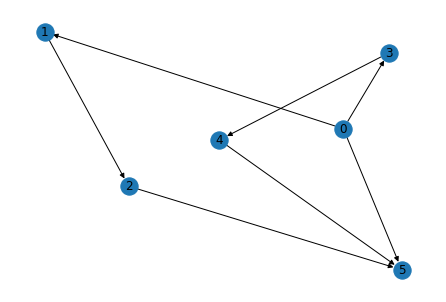

In [57]:
# Plot the graph
nx.draw(G, with_labels=True)

In [58]:
# Get the adjacency matrix
A = nx.linalg.graphmatrix.adjacency_matrix(G).todense()
A

prior_graph = A

In [69]:
# Get DECI prior
prior = get_prior(
    graph=G, 
    prior_adj_matrix=prior_graph,
    alpha=.9,
    rho=.9,
    lambda_=.05
)

In [70]:
prior

7.162193463312225e-07

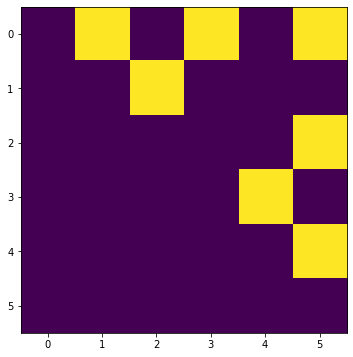

In [72]:
plt.figure(figsize=(10, 6))
plt.imshow(A)
plt.show()